In [1]:
# mounting on Google Drive,below 2 lines helps in getting the authorization code by loggin into your Google account
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
# Importing all the required libraries
import os
import matplotlib as mpl 
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

import pandas as pd
import numpy as np

from PIL import Image

from skimage.feature import hog
from skimage.color import rgb2grey
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from itertools import cycle 
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

In [11]:
# Import PCA datastet
PCA_PATH = "/gdrive/Shareddrives/ALDA_Project/data/pca_dataset/PCs.npy"
LABELS_PATH = "/gdrive/Shareddrives/ALDA_Project/data/pca_dataset/labels.npy"
Img_PATH = "/gdrive/Shareddrives/ALDA_Project/data/pca_dataset/images.npy"
# X as it has dataset containing PC's per image
pcs = np.load(PCA_PATH) 
# Y as it has labels for particular image
labels = np.load(LABELS_PATH) 
images = np.load(Img_PATH) 

CLASS_NAMES = ["elliptical", "spiral", "irregular", "invalid"]


In [4]:
print("Image", images[1])

Image [[[0.01960784 0.02745098 0.02745098]
  [0.02352941 0.03137255 0.03137255]
  [0.02352941 0.03137255 0.03137255]
  ...
  [0.01568627 0.01568627 0.03529412]
  [0.01568627 0.01960784 0.03921569]
  [0.01176471 0.01176471 0.03137255]]

 [[0.01568627 0.02352941 0.02352941]
  [0.00392157 0.01176471 0.01176471]
  [0.03137255 0.03921569 0.03921569]
  ...
  [0.05882353 0.0627451  0.0745098 ]
  [0.01176471 0.01568627 0.02745098]
  [0.         0.         0.01176471]]

 [[0.00784314 0.01568627 0.01568627]
  [0.03137255 0.03921569 0.03921569]
  [0.01960784 0.02745098 0.02745098]
  ...
  [0.02352941 0.03137255 0.03137255]
  [0.00392157 0.01176471 0.01568627]
  [0.00392157 0.01176471 0.01568627]]

 ...

 [[0.00784314 0.02352941 0.00392157]
  [0.00392157 0.01960784 0.        ]
  [0.01568627 0.03137255 0.01176471]
  ...
  [0.00392157 0.01176471 0.01176471]
  [0.00784314 0.01568627 0.01960784]
  [0.00392157 0.01176471 0.01176471]]

 [[0.00392157 0.01960784 0.        ]
  [0.00392157 0.01960784 0.    

In [5]:
# Displaying PCs and labels for reference
print("PCs", pcs)
print("Labels", labels)

PCs [[-1.20962156e+02  1.75962803e+01 -7.39683366e-01 ... -2.37620136e-01
  -7.60394073e-01 -5.10296175e-01]
 [-1.15704721e+02  3.30918087e+01  8.80431876e-01 ...  1.49898899e+00
   4.37087498e-01 -1.61721263e-01]
 [-1.27425167e+02  2.67042944e+01  3.49137069e+00 ... -5.36474693e-01
   1.16024152e-01 -2.06285057e-01]
 ...
 [ 1.65024157e+02  4.24649328e+00 -9.49062745e+00 ...  5.23153691e+00
   3.17625353e+00  4.84789733e-01]
 [ 4.81453491e+02 -6.25326808e+00  2.86890867e+01 ...  1.48269107e+00
   5.39139924e+00  5.81438066e+00]
 [ 3.15160803e+02  4.92399015e+00 -9.05526461e+01 ... -1.18410216e-01
  -5.06392767e-02 -5.33762137e-01]]
Labels [0 0 0 ... 3 3 3]


In [6]:
# Using dataframes to store X and Y values
X = pd.DataFrame(pcs)
y = pd.Series(labels)
# splitting the data set into X_train,X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
# Looking at distribution of labels in the training set
pd.Series(y_train).value_counts()
#type(y_train)

2    710
1    694
0    681
3    589
dtype: int64

In [7]:
# Applying SVM on X_train, y_train data 
svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train, y_train)
# predicting the test dataset values 
y_pred = svm.predict(X_test)
# printing classification report which has precision,recall,accuraccy...etc
print(classification_report(y_test, y_pred, digits=8))

              precision    recall  f1-score   support

           0  0.79360465 0.88064516 0.83486239       310
           1  0.86206897 0.81433225 0.83752094       307
           2  0.86392405 0.94137931 0.90099010       290
           3  0.97448980 0.79916318 0.87816092       239

    accuracy                      0.86125654      1146
   macro avg  0.87352187 0.85887997 0.86288359      1146
weighted avg  0.86746392 0.86125654 0.86133844      1146



In [8]:
#Applying Random Forest classifier on our dataset with number of trees in the forest to be 100
regressor = RandomForestClassifier(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)
# predicting the test dataset values 
y_pred = regressor.predict(X_test)
#preview of Actual and Predicted values from Random Forest classification
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
print(df)
# printing classification report which has precision,recall,accuraccy...etc
print(classification_report(y_test, y_pred, digits=8))

      Actual  Predicted
2647       2          2
2434       2          2
2024       2          2
17         0          0
1588       1          1
...      ...        ...
1729       1          1
1077       1          1
866        0          0
2722       2          2
751        0          0

[1146 rows x 2 columns]
              precision    recall  f1-score   support

           0  0.89776358 0.90645161 0.90208668       310
           1  0.91929825 0.85342020 0.88513514       307
           2  0.91233766 0.96896552 0.93979933       290
           3  0.96250000 0.96652720 0.96450939       239

    accuracy                      0.92059337      1146
   macro avg  0.92297487 0.92384113 0.92288263      1146
weighted avg  0.92072137 0.92059337 0.92010725      1146



In [10]:
df = df.reset_index()
df

,index,Actual,Predicted
0,2647,2,2
1,2434,2,2
2,2024,2,2
3,17,0,0
4,1588,1,1
...,...,...,...
1141,1729,1,1
1142,1077,1,1
1143,866,0,0
1144,2722,2,2


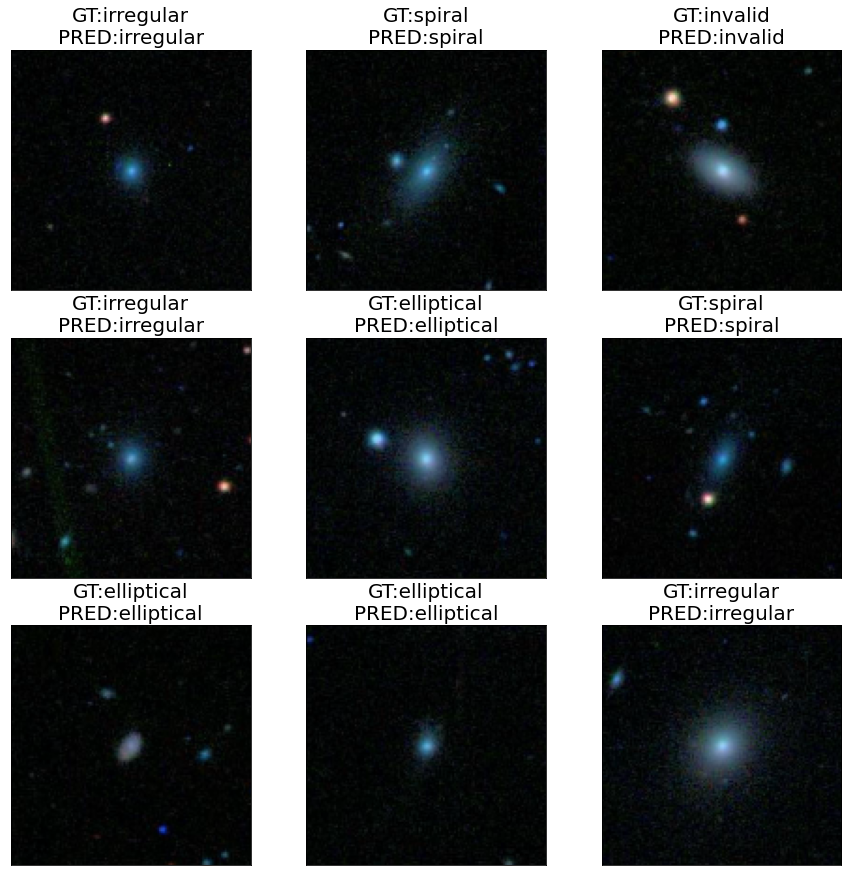

In [22]:
import random
# sample images
cols = 3
rows = 3
NO_INDICES = df.shape[0]
plt.figure(figsize=(cols*5, rows*5))
for i in range(rows):
  for j in range(cols):
    ax = plt.subplot(rows, cols, i*cols + j+1)
    indx = random.randint(0, NO_INDICES -1)

    gt = df.Actual[indx]
    pred = df.Predicted[indx]
    title_string = "GT:" + str(CLASS_NAMES[gt]) + "\nPRED:" + str(CLASS_NAMES[pred])

    ax.set_xticks([])
    ax.set_yticks([])
    
    ax.set_title(title_string, fontdict={"fontsize": 20})
    ax.imshow(images[indx])



# plt.imshow(images[2647])
# print("Actual=", df.Actual[2647])
# print("Prediction=" ,df.Predicted[2647])

In [ ]:
# sample images
cols = 3
rows = 3

row_images = []

for i in range(rows):
  indices = np.random.rand(cols)
  indices = (indices*NUMBER_IMAGES).astype(np.int64)  

  row = images[indices[0], ...]
  for j in range(1, cols):
    row = np.hstack((row, images[indices[j]]))
  
  row_images.append(row[:])

image = row_images[0]
for i in range(1, rows):
  image = np.vstack((image, row_images[i]))

plt.figure(figsize=(cols*3, rows*3))
plt.imshow(image)

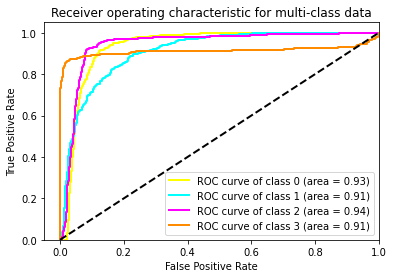

In [ ]:
#Binarize the y values,so that extend these algorithms to the multi-class classification case
y = label_binarize(y, classes=[0, 1, 2, 3])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.5, random_state = 0)

#svm_linear = OneVsRestClassifier(SVC(kernel= 'linear', probability = True, random_state=0))
svm = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=42))
y_score = svm.fit(X_train, y_train).decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['yellow', 'cyan', 'magenta', 'darkorange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color = color, lw = 2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw = 2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc = "lower right")
plt.show()

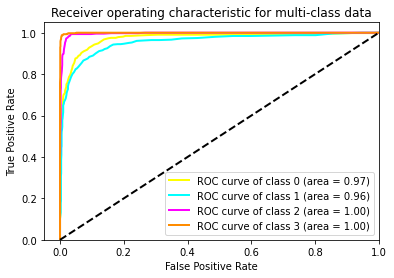

In [ ]:
#y = label_binarize(y, classes=[0, 1, 2, 3])
#n_classes = y.shape[1]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.5, random_state = 0)

#svm_linear = OneVsRestClassifier(SVC(kernel= 'linear', probability = True, random_state=0))
rf = OneVsRestClassifier(RandomForestClassifier(n_estimators = 100, random_state = 0))
y_score = rf.fit(X_train, y_train).predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['yellow', 'cyan', 'magenta', 'darkorange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color = color, lw = 2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw = 2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc = "lower right")
plt.show()